## Solutions

### Exercise 1

Simulate job / career paths

In reading the code, recall that `optimal_policy[i, j]` = policy at
$ (\theta_i, \epsilon_j) $ = either 1, 2 or 3; meaning ‘stay put’,
‘new job’ and ‘new life’

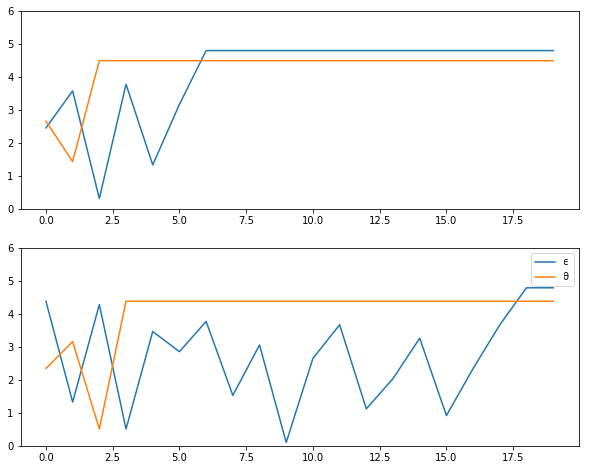

In [8]:
F = np.cumsum(cw.F_probs)
G = np.cumsum(cw.G_probs)
v_star = solve_model(cw, verbose=False)
T, get_greedy = operator_factory(cw)
greedy_star = get_greedy(v_star)

def gen_path(optimal_policy, F, G, t=20):
    i = j = 0
    θ_index = []
    ϵ_index = []
    for t in range(t):
        if greedy_star[i, j] == 1:       # Stay put
            pass
        elif greedy_star[i, j] == 2:     # New job
            j = int(qe.random.draw(G))
        else:                            # New life
            i, j = int(qe.random.draw(F)), int(qe.random.draw(G))
        θ_index.append(i)
        ϵ_index.append(j)
    return cw.θ[θ_index], cw.ϵ[ϵ_index]


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
for ax in axes:
    θ_path, ϵ_path = gen_path(greedy_star, F, G)
    ax.plot(ϵ_path, label='ϵ')
    ax.plot(θ_path, label='θ')
    ax.set_ylim(0, 6)

plt.legend()
plt.show()

### Exercise 2

The median for the original parameterization can be computed as follows

In [9]:
cw = CareerWorkerProblem()
F = np.cumsum(cw.F_probs)
G = np.cumsum(cw.G_probs)
T, get_greedy = operator_factory(cw)
v_star = solve_model(cw, verbose=False)
greedy_star = get_greedy(v_star)

@njit
def passage_time(optimal_policy, F, G):
    t = 0
    i = j = 0
    while True:
        if optimal_policy[i, j] == 1:    # Stay put
            return t
        elif optimal_policy[i, j] == 2:  # New job
            j = int(qe.random.draw(G))
        else:                            # New life
            i, j  = int(qe.random.draw(F)), int(qe.random.draw(G))
        t += 1

@njit(parallel=True)
def median_time(optimal_policy, F, G, M=25000):
    samples = np.empty(M)
    for i in prange(M):
        samples[i] = passage_time(optimal_policy, F, G)
    return np.median(samples)

median_time(greedy_star, F, G)

7.0

To compute the median with $ \beta=0.99 $ instead of the default
value $ \beta=0.95 $, replace `cw = CareerWorkerProblem()` with
`cw = CareerWorkerProblem(β=0.99)`

The medians are subject to randomness, but should be about 7 and 14 respectively

Not surprisingly, more patient workers will wait longer to settle down to their final job

### Exercise 3

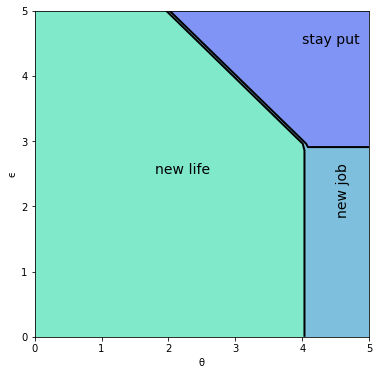

In [10]:
cw = CareerWorkerProblem(G_a=100, G_b=100)
T, get_greedy = operator_factory(cw)
v_star = solve_model(cw, verbose=False)
greedy_star = get_greedy(v_star)

fig, ax = plt.subplots(figsize=(6, 6))
tg, eg = np.meshgrid(cw.θ, cw.ϵ)
lvls = (0.5, 1.5, 2.5, 3.5)
ax.contourf(tg, eg, greedy_star.T, levels=lvls, cmap=cm.winter, alpha=0.5)
ax.contour(tg, eg, greedy_star.T, colors='k', levels=lvls, linewidths=2)
ax.set(xlabel='θ', ylabel='ϵ')
ax.text(1.8, 2.5, 'new life', fontsize=14)
ax.text(4.5, 2.5, 'new job', fontsize=14, rotation='vertical')
ax.text(4.0, 4.5, 'stay put', fontsize=14)
plt.show()

In the new figure, you see that the region for which the worker
stays put has grown because the distribution for $ \epsilon $
has become more concentrated around the mean, making high-paying jobs
less realistic